## Initial Setup

In [180]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\top100.json


## Overview

In [181]:
df = pd.read_json('input/top100.json')
df.head()


,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
0,1,1,Mariah Carey,All I Want For Christmas Is You,1 Last Week,1 Peak Rank,37 Weeks on Chart,2020-01-04
1,2,2,Brenda Lee,Rockin' Around The Christmas Tree,2 Last Week,2 Peak Rank,32 Weeks on Chart,2020-01-04
2,3,3,Bobby Helms,Jingle Bell Rock,9 Last Week,3 Peak Rank,30 Weeks on Chart,2020-01-04
3,4,4,Burl Ives,A Holly Jolly Christmas,6 Last Week,4 Peak Rank,15 Weeks on Chart,2020-01-04
4,5,5,Post Malone,Circles,3 Last Week,1 Peak Rank,17 Weeks on Chart,2020-01-04


### Checking dtypes and missing values

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5200 non-null   int64         
 1   rank            5200 non-null   int64         
 2   artist          5200 non-null   object        
 3   song            5200 non-null   object        
 4   rank_last_week  5200 non-null   object        
 5   peak_rank       5200 non-null   object        
 6   weeks_on_chart  5200 non-null   object        
 7   date            5200 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 325.1+ KB


### Checking date distribution

every date resembles one week and should have 100 entries

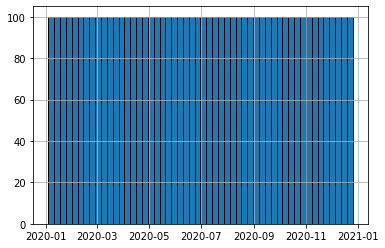

In [183]:
bins = df['date'].unique()
df['date'].hist(bins=52 , ec='black')
plt.show()

In [184]:
df['id'].groupby(df['date']).count()

date
2020-01-04    100
2020-01-11    100
2020-01-18    100
2020-01-25    100
2020-02-01    100
2020-02-08    100
2020-02-15    100
2020-02-22    100
2020-02-29    100
2020-03-07    100
2020-03-14    100
2020-03-21    100
2020-03-28    100
2020-04-04    100
2020-04-11    100
2020-04-18    100
2020-04-25    100
2020-05-02    100
2020-05-09    100
2020-05-16    100
2020-05-23    100
2020-05-30    100
2020-06-06    100
2020-06-13    100
2020-06-20    100
2020-06-27    100
2020-07-04    100
2020-07-11    100
2020-07-18    100
2020-07-25    100
2020-08-01    100
2020-08-08    100
2020-08-15    100
2020-08-22    100
2020-08-29    100
2020-09-05    100
2020-09-12    100
2020-09-19    100
2020-09-26    100
2020-10-03    100
2020-10-10    100
2020-10-17    100
2020-10-24    100
2020-10-31    100
2020-11-07    100
2020-11-14    100
2020-11-21    100
2020-11-28    100
2020-12-05    100
2020-12-12    100
2020-12-19    100
2020-12-26    100
Name: id, dtype: int64

## Data Preparation

removing unwanted text

In [185]:
df['rank_last_week'] = df['rank_last_week'].apply(lambda rank_last_week: rank_last_week[:-10]).replace('-', 0)
df['peak_rank'] = df['peak_rank'].apply(lambda peak_rank: peak_rank[:-10]).replace('-', 0)
df['weeks_on_chart'] = df['weeks_on_chart'].apply(lambda weeks_on_chart: weeks_on_chart[:-15]).replace('-', 0)

df.tail()

,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
5195,5196,96,Carrie Underwood & John Legend,Hallelujah,0,96,1,2020-12-26
5196,5197,97,DaBaby,Practice,0,86,5,2020-12-26
5197,5198,98,Ritt Momney,Put Your Records On,0,79,9,2020-12-26
5198,5199,99,Bad Bunny,Te Mudaste,60,60,2,2020-12-26
5199,5200,100,Carrie Underwood,Silent Night,0,100,1,2020-12-26


changing dtype of rank_last_week, peak_rank, weeks_on_chart to numeric

In [186]:
for col in ['rank_last_week', 'peak_rank', 'weeks_on_chart']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

id                         int64
rank                       int64
artist                    object
song                      object
rank_last_week             int64
peak_rank                  int64
weeks_on_chart             int64
date              datetime64[ns]
dtype: object

#### Grouping song and artist

To avoid redundent lyrics requests for lyrics I might already I have, I grouped artists and songs.

In [187]:
artist_song_pt = pd.pivot_table(df, index=['artist', 'song'], values=['peak_rank', 'weeks_on_chart'], aggfunc={'peak_rank' : 'min', 'weeks_on_chart' : 'max'})
artist_song_pt

peak_rank  \
artist                     song                                        
21 Savage & Metro Boomin   Brand New Draco                        57   
                           Glock In My Lap                        19   
                           Many Men                               33   
                           My Dawg                                56   
                           No Opp Left Behind                     71   
...                                                              ...   
Zac Brown Band             The Man Who Loves You The Most         96   
Zayn                       Better                                 89   
blackbear                  Hot Girl Bummer                        11   
surf mesa Featuring Emilee ily                                    23   
twenty one pilots          Level Of Concern                       23   

                                                           weeks_on_chart  
artist                     song                                            
21 Savage & Metro Boomin   Brand New Draco                              1  
                           Glock In My Lap                              3  
                           Many Men                                     2  
                           My Dawg                                      1  
                           No Opp Left Behind                           1  
...                                                                   ...  
Zac Brown Band             The Man Who Loves You The Most               1  
Zayn                       Better                                       1  
blackbear                  Hot Girl Bummer                             42  
surf mesa Featuring Emilee ily                                         28  
twenty one pilots          Level Of Concern                            11  

[768 rows x 2 columns]

In [188]:
print('Unique song names:', len(df['artist'].unique()))
print('Unique artist names:',len(df['song'].unique()))

Unique song names: 455
Unique artist names: 756


turning the pivot table into a data frame

In [189]:
artist_song_list = []

for row in artist_song_pt.itertuples():
    artist_song_list.append(row)

artist_song = pd.DataFrame(artist_song_list)

artist_song[['artist', 'song']] = pd.DataFrame(artist_song['Index'].tolist())

artist_song = artist_song[['artist', 'song', 'weeks_on_chart', 'peak_rank']]
artist_song.head()

,artist,song,weeks_on_chart,peak_rank
0,21 Savage & Metro Boomin,Brand New Draco,1,57
1,21 Savage & Metro Boomin,Glock In My Lap,3,19
2,21 Savage & Metro Boomin,Many Men,2,33
3,21 Savage & Metro Boomin,My Dawg,1,56
4,21 Savage & Metro Boomin,No Opp Left Behind,1,71


rough overview

In [190]:
artist_song.describe()


,weeks_on_chart,peak_rank
count,768.000000,768.000000
mean,8.576823,48.932292
std,10.975584,29.371080
min,1.000000,1.000000
25%,1.000000,24.000000
50%,2.000000,49.500000
75%,14.000000,74.000000
max,61.000000,100.000000


#### Working with censored songs

Explicit songnames are censored on billboard but uncensored on genius, which can cause problems when searching for the lyrics.

Identifying censored words.

In [191]:
censored_songnames = artist_song.loc[artist_song['song'].str.contains('\*')]['song']
censored_songnames = censored_songnames.tolist()

censored_words = []
for songname in censored_songnames:
        words = songname.split(' ')
        for word in words:
            if '*' in word:
                censored_words.append(word)

print(len(censored_words), 'censored words:', censored_words)

8 censored words: ['N*ggas', 'N*gga', 'Sh*t', 'SH*T', 'P*$$y', 'N**gas', 'B*tch', 'F*ck']


Putting every word in a dictionary makes it easy to replace them later with the created `get_uncensored_string` function

In [192]:
#manual solution due to small size of list, may change later
censorship = {
                 'N*ggas' : 'Niggas',
                 'N*gga' : 'Nigga',
                 'Sh*t' : 'Shit',
                 'SH*T' : 'SHIT',
                 'P*$$y' : 'Pu$$y',
                 'N**gas' : 'Niggas',
                 'B*tch' : 'Bitch',
                 'F*ck' : 'Fuck'
}


def get_uncensored_string(censored_string):
    uncensored_words = []
    words = censored_string.split(' ')
    for word in words:
        if word in censorship:
            word = censorship[word]
        uncensored_words.append(word)
    return ' '.join(uncensored_words)

`get_uncesored_string` in action:

In [193]:
artist_song.iloc[9]

artist            21 Savage & Metro Boomin
song                     Steppin On N*ggas
weeks_on_chart                           1
peak_rank                               74
Name: 9, dtype: object

In [194]:
artist_song['song'] = artist_song['song'].apply(lambda song: get_uncensored_string(song))
artist_song.iloc[9]

artist            21 Savage & Metro Boomin
song                     Steppin On Niggas
weeks_on_chart                           1
peak_rank                               74
Name: 9, dtype: object

In [195]:
artist_song.head()

,artist,song,weeks_on_chart,peak_rank
0,21 Savage & Metro Boomin,Brand New Draco,1,57
1,21 Savage & Metro Boomin,Glock In My Lap,3,19
2,21 Savage & Metro Boomin,Many Men,2,33
3,21 Savage & Metro Boomin,My Dawg,1,56
4,21 Savage & Metro Boomin,No Opp Left Behind,1,71


Exporting DataFrame as a json to get lyrics with the genius framework

In [196]:
artist_song.to_json('output/artist_song.json')